# Klasyfikacja za pomocą algorytmu wektorów wspierających (SVM)
Rozwiązanie: Zofia Hendrysiak

Na tych ćwiczeniach zapoznamy się z zastosowaniem SVM do klasyfikacji.


In [ ]:
import numpy as np
import matplotlib.pylab as plt
import pandas as pd
import seaborn as sns
from sklearn import svm
from sklearn import datasets
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

def printScores(model, X, Y):
    # użyj classification_report() żeby policzyć najpopularniejsze miary 
    print("Classification report:")
    print(classification_report(Y, model.predict(X)))
    # wypisz macierz pomyłek 
    print("Confusion matrix:")
    print(confusion_matrix(Y, model.predict(X)))

## Zbiór danych irysy
Tak jak w notebooku "Naiwny klasyfikator Bayesa" używać będziemy zbioru `Iris`. Dla wygodny ponownie umieścimy dane w `pandas.DataFrame`.

Proszę:
- załadować dane za pomocą `sklearn.dataset.load_iris`,
- umieścić dane w `pandas.DataFrame`
- wypisać dostępne kolumny

In [ ]:
iris = datasets.load_iris() 
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df["label"] = iris.target
print(dir(iris))

['DESCR', 'data', 'data_module', 'feature_names', 'filename', 'frame', 'target', 'target_names']


#### Przygotowanie danych

W pierwszej części ćwiczeń zapoznamy się ze specyfiką modeli SVM. Wyłącznie w celu ułatwienia wizualizacji ograniczymy się na razie do dwóch cech i dwóch klas. 

Proszę:
- utworzyć nowy `pandas.DataFrame` zawierający jedynie cechy `petal width (cm)`,  `petal length (cm)` dla klas `0`, `1`.
- proszę wypisać na ekran początek ("głowę") danych zawartych w stworzonym obiekcie DataFrame

In [ ]:
chosen_features=['petal length (cm)','petal width (cm)']
drop_columns=['sepal length (cm)','sepal width (cm)']
#df = pd.DataFrame(data, columns = 'sepal length (cm)','sepal width (cm)')
df = iris_df.drop(columns=drop_columns)

df = df[df["label"]!=2]
#df = df[df["label"]==1]
print(df)


    petal length (cm)  petal width (cm)  label
0                 1.4               0.2      0
1                 1.4               0.2      0
2                 1.3               0.2      0
3                 1.5               0.2      0
4                 1.4               0.2      0
..                ...               ...    ...
95                4.2               1.2      1
96                4.2               1.3      1
97                4.3               1.3      1
98                3.0               1.1      1
99                4.1               1.3      1

[100 rows x 3 columns]


## Analiza wizualna danych

Proszę:
- narysować dwuwymiarowy wykres punktowy cech X=`petal length (cm)`, Y=`petal width (cm)` z podziałem na klasy
- na podstawie rysunku proszę stwierdzić czy klasy są łatwo separowalne

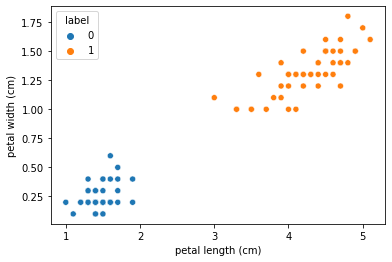

In [ ]:
sns.scatterplot(data=df, x="petal length (cm)", y="petal width (cm)", hue = "label")

## Tworzymy i uczymy klasyfikator

Proszę:
- zaimportować model `SVC` z `sklearn.svm`. Aby uzyskać model liniowy należy podać parametr `kernel = linear`,
- wyuczyć model na ostatnio przygotowanych danych
- wypisać miary jakości oraz macierz pomyłek za pomocą funkcji ```printScores()``` używanej na poprzednich ćwiczeniach
- na podstawie analizy metryk proszę stwierdzić jak dobrze klasy zostały odseparowane

In [ ]:
model = svm.SVC(kernel = 'linear')
model.fit(df[['petal length (cm)','petal width (cm)']], df['label'])
printScores(model, X=df.drop(columns = 'label'), Y=df['label']) 

Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        50

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100

Confusion matrix:
[[50  0]
 [ 0 50]]


## Wizualizacja separacji klas
Wynik naszego modelu możemy zobrazować za pomocą położenia wektorów wspierających oraz granic funkcji decyzyjnej.

Proszę
- wypisać wektory wspierające za pomocą `SVC.support_vectors_`. Oczekiwany wynik to:
```
Support vectors: 
 [[1.9 0.4]
 [3.  1.1]]
```
- na jednym rysunku narysować:
    -dane
    - wektory wspierające 
    - granice funkcji decyzyjnej. 
    
Wykorzystaj zdefiniowane poniżej funkcje `plot_support_vectors` i `plot_decision_function`.

In [ ]:
def plot_support_vectors(support_vectors, axis):
  axis.scatter(support_vectors[:,0], support_vectors[:,1],s=100,
               linewidth=1, facecolors='none', edgecolors='k')
  
def plot_decision_function(model, axis):
  xlim = axis.get_xlim()
  ylim = axis.get_ylim()
  xx = np.linspace(xlim[0], xlim[1], 30)
  yy = np.linspace(ylim[0], ylim[1], 30)
  YY, XX = np.meshgrid(yy, xx)
  xy = np.vstack([XX.ravel(), YY.ravel()]).T
  Z = model.decision_function(xy).reshape(XX.shape)

  axis.contour(
      XX, YY, Z, colors="k", levels=[-1, 0, 1], alpha=0.5, linestyles=["--", "-", "--"]
  )

Support vectors: 
 [[1.9 0.4]
 [3.  1.1]]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


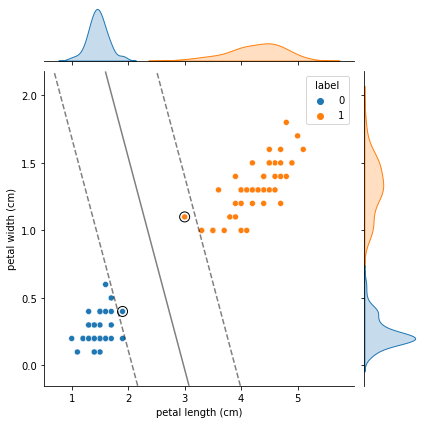

In [ ]:
print("Support vectors: \n", model.support_vectors_)
graph = sns.jointplot(data=df, x="petal length (cm)", y="petal width (cm)", hue = "label")
plot_support_vectors(model.support_vectors_, axis=graph.ax_joint)
plot_decision_function(model, axis=graph.ax_joint)

Poprzednim razem, gdy pracowaliśmy ze zbiorem danych `Iris` zaczeliśmy od znormalizowania danych. Sprawdźmy, czy normalizacja wpływa na model SVM.
Poprzednim razem normalizowaliśmy dane podając wzór explicite , "ręcznie". Teraz zrobimy to za pomocą `sklearn.preprocessing.StandardScaler`

Proszę:
- utworzyć nowy `pandas.DataFrame` zawierający znormalizowane cechy `['petal length (cm)','petal width (cm)']`. Do normalizacji wykorzystaj `sklearn.preprocessing.StandardScaler`, wcześniej importując odpowiednią bibliotekę,
- utworzyć model liniowy SVM i wyuczyć go na znormalizowanych danych,
- na jednym rysynku przedstawić znormalizowane dane oraz wektory wspierające i granicę decyzyjną modelu.


In [ ]:
from sklearn.preprocessing import StandardScaler

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


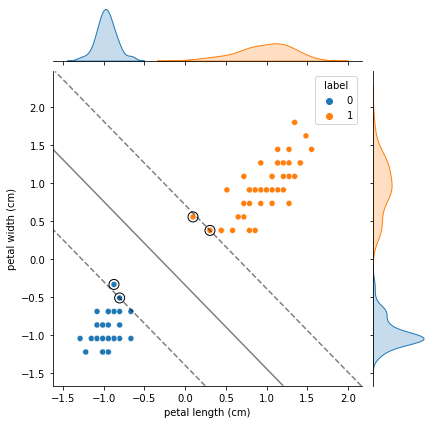

In [ ]:
scaler=StandardScaler()
df_norm = scaler.fit_transform(df.drop(columns = 'label'))
df_norm = pd.DataFrame(data=df_norm, columns=['petal length (cm)','petal width (cm)'])
df_norm['label'] = df['label']
model = svm.SVC(kernel = 'linear')
model.fit(df_norm[['petal length (cm)','petal width (cm)']], df_norm['label'])

graph=sns.jointplot(data=df_norm, x="petal length (cm)", y="petal width (cm)", hue = "label")
plot_support_vectors(model.support_vectors_, axis=graph.ax_joint)
plot_decision_function(model, axis=graph.ax_joint)

Porównując z poprzednim rysunkiem, powinniśmy otrzymać inną granicę decyzyjną pomimo tego, że dane mają ten sam kształt.

**Normalizacja jest bardzo ważna dla modeli SVM!**

### Klasyfikacja miękkiego marginesu

Sprawdźmy teraz jak model liniowy SVM sprawdzi się do klasyfikacji klas `1` i `2`, które nie są już w pełni odseparowane

Proszę:
- przygotować nowy `pandas.DataFrame` zawierający znormalizowane cechy `['petal length (cm)','petal width (cm)']` dla klas `1`, `2`,
- narysować przygotowany zbiór danych.
- na podstawie analizy rysunku stwierdzić czy dane są łatwo separowalne, czy też klasy się częściowo przekrywają

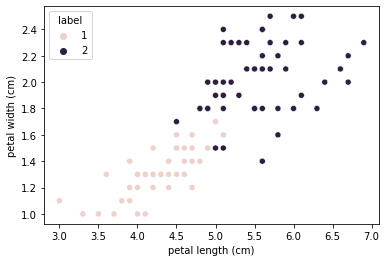

In [ ]:
chosen_features=['petal length (cm)','petal width (cm)']
drop_columns=['sepal length (cm)','sepal width (cm)']
#df = pd.DataFrame(data, columns = 'sepal length (cm)','sepal width (cm)')
df1 = iris_df.drop(columns=drop_columns)

df1 = df1[df1["label"]!=0]

sns.scatterplot(data=df1, x='petal length (cm)',y='petal width (cm)',hue='label')

Proszę:
- utworzyć model liniowy SVM i wyuczyć go na zbiorze danych,
- narysować zbiór danych oraz wektory wspierające i granice funkcji decyzyjnej,modelu
- wypisać miary jakości. Oczekiwany wynik dla macierzy pomyłek to:
```
Confusion matrix:
[[47  3]
 [ 3 47]]
```

Classification report:
              precision    recall  f1-score   support

           1       0.96      0.94      0.95        50
           2       0.94      0.96      0.95        50

    accuracy                           0.95       100
   macro avg       0.95      0.95      0.95       100
weighted avg       0.95      0.95      0.95       100

Confusion matrix:
[[47  3]
 [ 2 48]]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


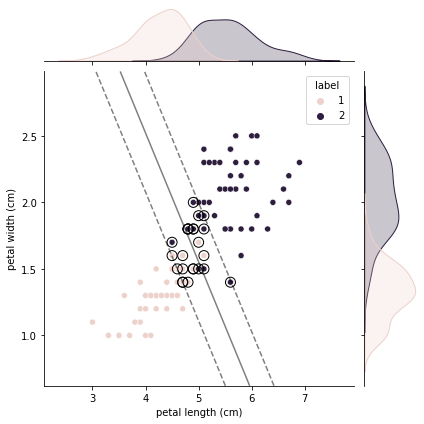

In [ ]:
model = svm.SVC(kernel = 'linear')
model.fit(df1[['petal length (cm)','petal width (cm)']], df1['label'])
printScores(model, X=df1.drop(columns = 'label'), Y=df1['label']) 

graph=sns.jointplot(data=df1, x="petal length (cm)", y="petal width (cm)", hue = "label")
plot_support_vectors(model.support_vectors_, axis=graph.ax_joint)
plot_decision_function(model, axis=graph.ax_joint)

Tym razem klasy nie są odseparowane, więc model musi czasem się mylić.

Model SVM ma hiperparametr `C` odpowiadający za szerokość marginesu.

Proszę:
- narysować dane, granice decyzyjne i wektory nośne dla hiperparametru `C` równego `0.1`, `1`,`100`.

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


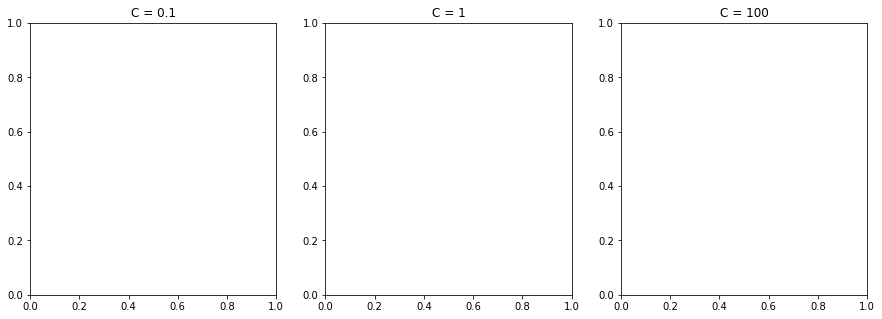

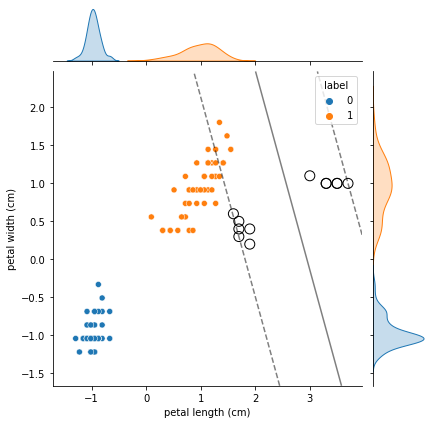

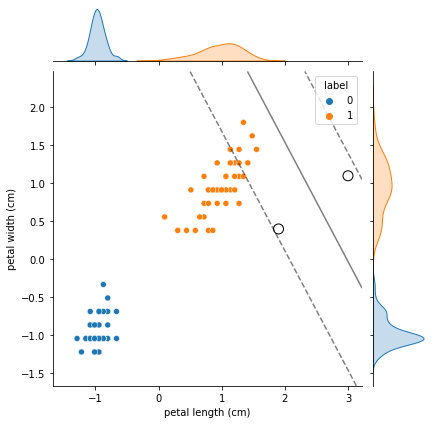

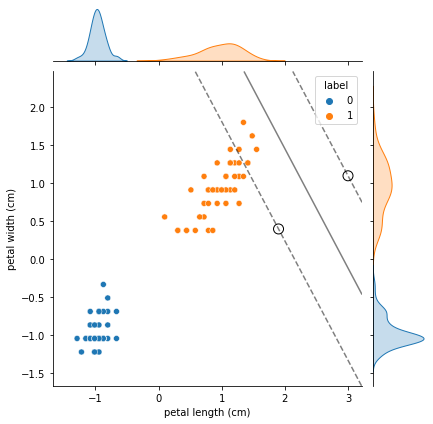

In [ ]:
fig, axes=plt.subplots(1,3, figsize=(15,5))
C_values=[0.1,1,100]
for ax, C in zip(axes, C_values):
  model = svm.SVC(kernel = 'linear', C=C)
  model.fit(df[['petal length (cm)','petal width (cm)']], df['label'])
  graph=sns.jointplot(data=df_norm, x="petal length (cm)", y="petal width (cm)", hue = "label", ax=ax)
  plot_support_vectors(model.support_vectors_, axis=graph.ax_joint)
  plot_decision_function(model, axis=graph.ax_joint)
  ax.set_title("C = {}".format(C))


## Zbiory nieseparowalne liniowo

Liniowe klasyfikatory w wielu przypadkach sprawdzają się bardzo dobrze, jednak wiele zbiorów nie jest liniowo rozdzielnych.

#### Okręgi 
Na początek potrzebujemy wygenerować liniowo nierozdzielny zbiór danych. `sklearn.datasets` oferuje funkcję `make_circles` tworzącą dane w kształcie współśrodkowych okręgów, które z całą (na pewno?) pewnością nie są liniowo separowalne.

Proszę:
- korzystając z `sklearn.datasets.make_circles` stwórz dane do anlizy. Przygotuj 1000 punktów z parametrami  ```factor=0.1``` oraz poziomem szumów ```noise =0.1 ```,
- umieść wygenerowane dane w `pandas.DataFrame` o kolumnach `x1`,`x2`,`label`
- narysować wykres punktowy cech `x1` i `x2` z uwzględnieniem przynależności do klas


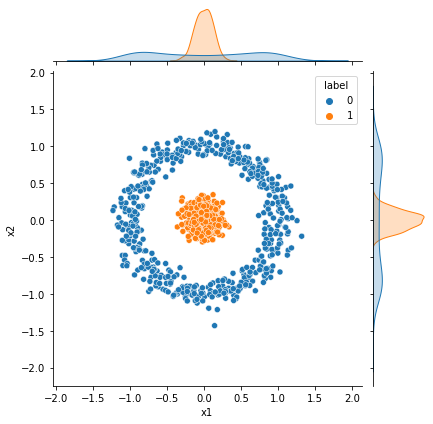

In [ ]:
X, Y = datasets.make_circles(n_samples=1000,factor=0.1,noise=0.1)
df= pd.DataFrame(X, columns=["x1","x2"])
df['label']=Y
sns.jointplot(data=df, x="x1", y="x2", hue = "label", ax=ax)

Dane mamy gotowe, sprawdźmy jak liniowy mode SVM sobie z nimi (nie)poradzi

Proszę:
- utworzyć model liniowy `SVM` i wyuczyć go na przygotowanych danych
- narysować wykres punktowy cech `x1` i `x2` z uwzględnieniem przynależności do klas, wektorami nośnymi i granicami decyzyjnymi (wykorzystaj przygotowane wcześniej funkcje)
- wypisać miary jakości. Oczekiwany wynik dla macierzy pomyłek to:
```
Confusion matrix:
[[181 319]
 [  0 500]]
```

Classification report:
              precision    recall  f1-score   support

           0       1.00      0.35      0.52       500
           1       0.61      1.00      0.76       500

    accuracy                           0.68      1000
   macro avg       0.80      0.68      0.64      1000
weighted avg       0.80      0.68      0.64      1000

Confusion matrix:
[[177 323]
 [  0 500]]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


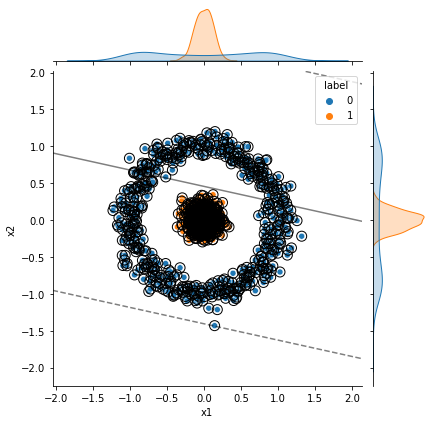

In [ ]:
model = svm.SVC(kernel = 'linear')
model.fit(df[['x1','x2']], df['label'])
printScores(model, X=df.drop(columns = 'label'), Y=df['label']) 

graph=sns.jointplot(data=df, x="x1", y="x2", hue = "label")
plot_support_vectors(model.support_vectors_, axis=graph.ax_joint)
plot_decision_function(model, axis=graph.ax_joint)

Jedną z możliwości poradzenie sobie z takim problem jest _feature engineering_, tzn. dodanie nowych cech, które lepiej opisywać będą nasz model. Jeżeli wymyślimy cechę, w której nasze dane będą separowalne liniowo to możemy dalej przeprowadzać klasyfikację liniową. W przypadku naszego zbioru danych w kształcie okręgów taką cechą jest ich promień.

Proszę:
- dodać nową cechę `radius2` będącą sumą kwadratów cech `x1` i `x2`,
- narysować wykres punktowy cech `x1` i `radius2` z uwzględnieniem przynależności do klas,
- utworzyć model i wyuczyć go na przygotowanych danych ,
- wypisać miary jakości.

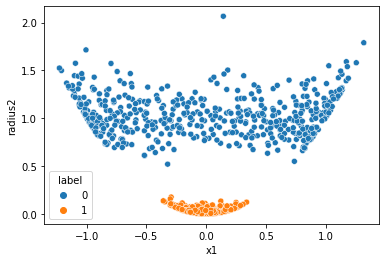

In [ ]:
df['radius2']=pow(df["x1"],2)+pow(df["x2"],2)
sns.scatterplot(data=df, x="x1", y="radius2", hue = "label")

In [ ]:
model = svm.SVC(kernel = 'linear')
model.fit(df[['x1','x2','radius2']], df['label'])
printScores(model, X=df.drop(columns = 'label'), Y=df['label']) 

Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       500
           1       1.00      1.00      1.00       500

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000

Confusion matrix:
[[500   0]
 [  0 500]]


#### Sierpy

Dla danych o kształcie okręgów udało nam się wymyślić cechę pozwalającą na separację liniową. Zazwyczaj jednak wymyślenie takiej cechy jest bardzo trudne i wymaga bardzo dużej wiedzy o zbiorze danych.

Spróbujmy szczęścia ze zbiorem w kształcie sierpów generowanym przez `sklearn.datasets.make_moons`.

Proszę (większość kodu można przekopiować z przykładu z okręgami):
- korzystając z `sklearn.datasets.make_moons` przygotować dane. Przygotuj 1000 punktów z poziomem szumów równym 0.1,
- umieścić wygenerowane dane w `pandas.DataFrame` o kolumnach `x1`,`x2`,`label`
- narysować wykres punktowy cech `x1` i `x2` z uwzględnieniem przynależności do klas

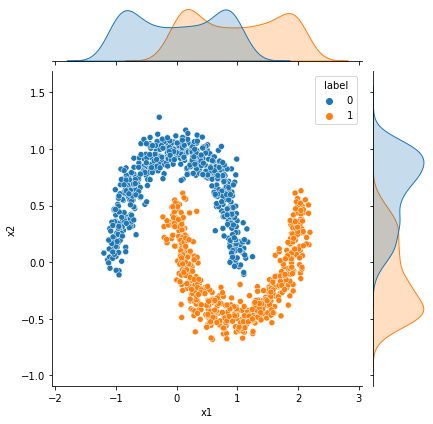

In [ ]:
X, Y = datasets.make_moons(n_samples=1000,noise=0.1)
df= pd.DataFrame(X, columns=["x1","x2"])
df['label']=Y
sns.jointplot(data=df, x="x1", y="x2", hue = "label", ax=ax)

Po krótkim namyśłe prawdopobnie nie jesteśmy wstanie podać żadnej cechy, która rozwiązałaby nasz problem. W takim razie możemy podążyć kilkoma drogami:
1. Dalej brnąć w modyfikowanie zbioru danych, np. dodać kolejne cechy korzystając z rozwinięcia wielomianowego (np. dla rozwinięcią wielomianowego stopnia 2  ze zbioru cech `(a,b,c)` dostaniemy cechy `(a, b, c, a*b, a*c, b*c, a*a, b*b, c*c)`. W tym przypadku ryzykujemy, że znacząco zwiększymy rozmiar zbioru danych, większość wygenerowanych cech i tak nie będzie zbyt istotna, a model stanie się bardziej podatny na przetrenowanie. `sklearn.preprocessing` ma oczywiście przygotowaną do tego gotową funkcję `PolynomialFeatures`.
1. Zmienić model na nieliniowy.

## Klasyfikacja nieliniowa SVM

W dalszej części wybierzemy opcję 2., co w naszym przypadku oznacza odejście od modelu liniowego SVM na rzecz modeli SVM z jądrem. Przetestujemy jądra wielomianowe oraz gaussowkie rbf.


Proszę:
- wyszkolić serię modeli SVM z jądrem wielomianowym o stopniach 2, 3 i 4. Rodzaj jądra można ustawić parametrem `kernel = 'poly'`, natomiast za stopnień wielomianu odpowiada parametr `degree`. Parametr `C` powinien być taki sam dla wszystkich modeli, proszę użyć `0.1`
- dla każdego modelu wykonać rysunek danych, wektorów wspierających i granicy decyzyjnej.


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


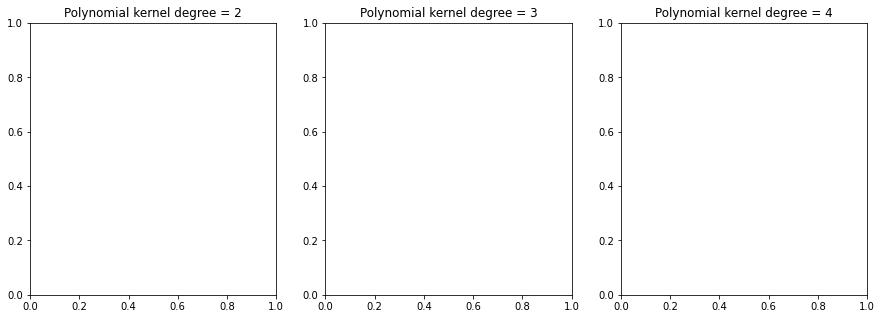

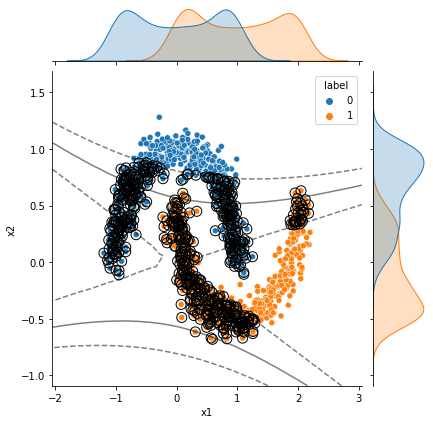

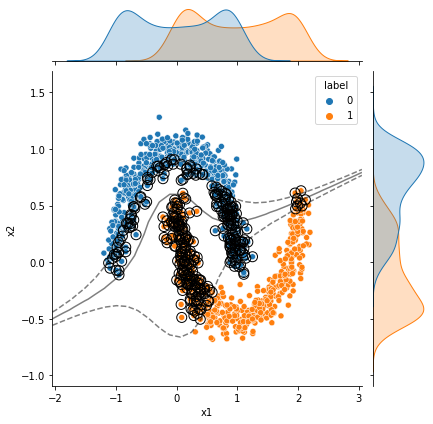

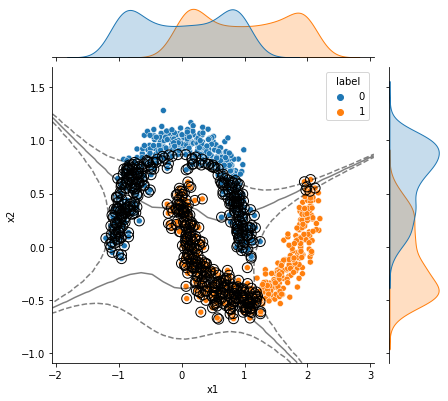

In [ ]:
_, axes=plt.subplots(1,3, figsize=(15,5))
degree_range=[2,3,4]
for ax, degree in zip(axes, degree_range):
  model = svm.SVC(kernel = 'poly', degree=degree, C=0.1)
  model.fit(df[['x1','x2']], df['label'])
  graph=sns.jointplot(data=df, x="x1", y="x2", hue = "label", ax=ax)
  plot_support_vectors(model.support_vectors_, axis=graph.ax_joint)
  plot_decision_function(model, axis=graph.ax_joint)
  ax.set_title("Polynomial kernel degree = {}".format(degree))
plt.subplots_adjust(bottom=0.15, left=0.05, right=0.95, wspace=0.3)     

Proszę:
- wyszkolić serię modeli SVM z jądrem gaussowskim: `rbf` o współczynnikach $\gamma $ równych `0.01`, `1` i `10`. Rodzaj jądra można ustawić parametrem `kernel = 'rbf'`, natomiast współczynnik $\gamma$ można kontrolować parametrem `gamma`. Parametr `C` powinien być taki sam dla wszystkich modeli. Proszę użyć wartości `0.1`
- dla każdego modelu wykonać rysunek danych, wektorów wspierających i granicy decyzyjnej.

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


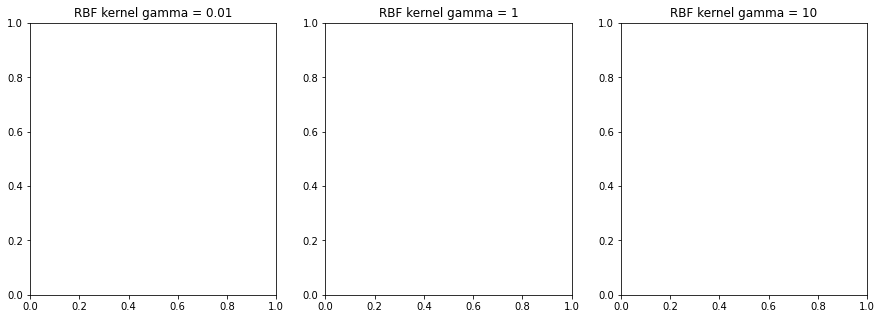

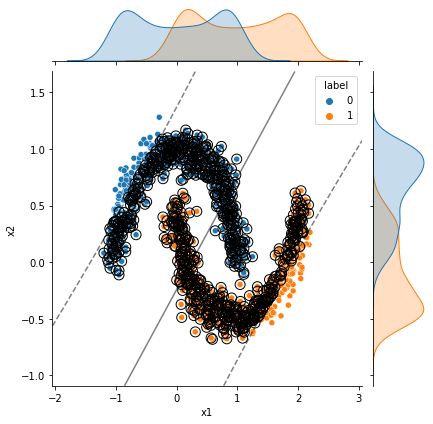

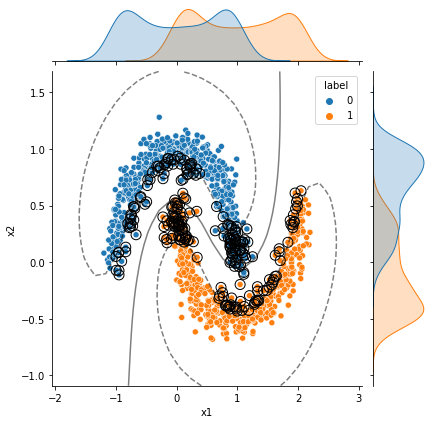

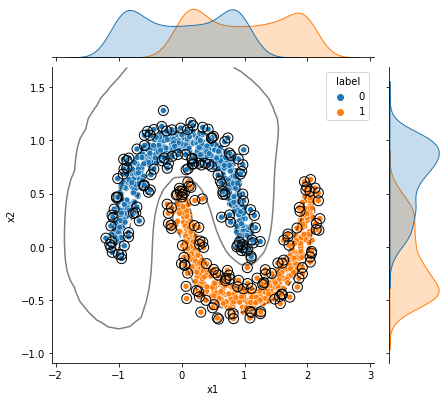

In [ ]:
_, axes=plt.subplots(1,3, figsize=(15,5))
gamma_range=[0.01,1,10]
for ax, gamma in zip(axes, gamma_range):
  model = svm.SVC(kernel = 'rbf', gamma=gamma, C=0.1)
  model.fit(df[['x1','x2']], df['label'])
  graph=sns.jointplot(data=df, x="x1", y="x2", hue = "label", ax=ax)
  plot_support_vectors(model.support_vectors_, axis=graph.ax_joint)
  plot_decision_function(model, axis=graph.ax_joint)
  ax.set_title("C = {}".format(C))
  ax.set_title("RBF kernel gamma = {}".format(gamma))
plt.subplots_adjust(bottom=0.15, left=0.05, right=0.95, wspace=0.3)     

### Klasyfikacja SVM irysów


Mając już pewne doświadczenie z modelami SVM wracamy do zbiorów irysów. Wciąż pracować będziemy z tymi samymi dwiema cechami (żeby  łatwo robić rysunki), ale tym razem będziemy pracować na wszystkich klasach, na poważnie dobierzemy hiperparametry i ocenimy jakość klasyfikacji.

Proszę:
- przygotwać nowy `pandas.DataFrame` zawierający znormalizowane cechy ['petal length (cm)','petal width (cm)'] dla klas 1, 2,
- podzielić zbiór danych na zbiór treningowy i testowy. Zbiór testowy powinien wynosić 0.3 całego zbioru,
- ustalić normalizację na zbiorze treningowym, następnie znormalizować oba zbiory.
- wytrenować CVM z jądrem RBF  parametrami ```gamma=1, C=0.1```
- wypisać wartości metryk na danych testowych dla uzyskanego modelu. Oczekiwany wynik to:
```
Confusion matrix:
[[14  0  0]
 [ 0 17  1]
 [ 0  1 12]]
```

In [ ]:
df = iris_df.drop(columns=drop_columns)
scaler=StandardScaler()
df_norm = scaler.fit_transform(df.drop(columns = 'label'))
df_norm = pd.DataFrame(data=df_norm, columns=['petal length (cm)','petal width (cm)'])
df_norm['label'] = df['label']

X_train, X_test, Y_train, Y_test = train_test_split(df_norm[['petal length (cm)','petal width (cm)']],df_norm['label'], random_state=1, train_size=0.7)

model = svm.SVC(kernel = 'rbf', gamma=1, C=0.1)
model.fit(X_train, Y_train)
printScores(model, X=X_test, Y=Y_test) 


Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.94      0.94      0.94        18
           2       0.92      0.92      0.92        13

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45

Confusion matrix:
[[14  0  0]
 [ 0 17  1]
 [ 0  1 12]]


Korzystając z funkcji ```plot_multiclass_decision(X, y, model)``` zdefiniowanej poniżej proszę narysować granice podziału klas.

Proszę:
* stwierdzić czy rysunek zgadza się z postacią macierzy pomyłek dla badanego modelu i danych

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


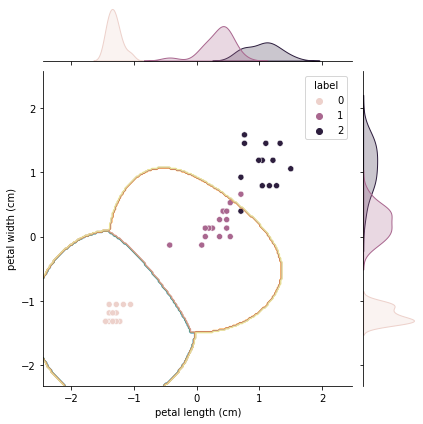

In [ ]:
def plot_multiclass_decision(X, Y, model):
  h=0.02
  x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
  y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
  Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  graph=sns.jointplot(x=X.iloc[:, 0], y=X.iloc[:, 1], hue=Y)
  graph.ax_joint.contour(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

plot_multiclass_decision(X_test, Y_test, model)

## Strojenie modelu

Jeżeli interesuje nas otrzymanie najlepszego modelu to musimy znaleźć (dostroić) jego hiperparametry. Dla modelu SVM z jądrem możemy zmieniać hiperparametry takie jak `C`, rodzaj jądra i hiperparametry specyficzne dla jądra (`gamma` dla `rbf`, `degree` dla `poly`). Przeszukiwania takiej wielowymiarowej przestrzeni nie musimy implementować sami, gotowe narzędzia znajdują się w `sklearn.model_selection`:
- `GridSearchCV` wykonujący systematyczny skan przestrzeni hiperparametrów,
- `RandomizedSearchCV` losowo ją próbkujący.

Proszę:

- zaimportować moduły zawierające klasy `GridSearchCV` i `RandomizedSearchCV`
- przygotować przestrzeń parametrów do przeszukania. Dla każdego typu jądra przygotuj słownik, gdzie kluczem jest nazwa parametru, a wartością jego zakres. Słownik powinien zawierać element o kluczu `kernel` i wartości będącej jednoelementową listą z nazwą jądra
  - dla wszystkich jąder przeszukaj parametr `C` w zakresie od 0.01 do 100 rozłożonym równomiernie w skali logarytmicznej (`np.logspace`).
  - dla jądra wielomianowego rozważ stopnie wielomianu równe 2,3,4.
  - dla jądra rbf przeszukaj parametr `gamma` w zakresie od 0.01 do 100 rozłożonym równomiernie w skali logarytmicznej,
- przygotować `GridSearchCV
` dla modelu `SVC` w zdefiniowanej przestrzeni parametrów. Jako kryterium oceniające model przyjmij `scoring = accuracy`,
- za pomocą `GridSearch.fit` znaleźć najlepsze parametry,


Przykład dla jądra wielomianowego:
```
parameters_poly=dict(kernel=['poly'], C=np.logspace(-2,2,30), degree=[2,3,4])
parameters=[parameters_poly,parameters_linear, parameters_rbf]
```

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
parameters_poly=dict(kernel=['poly'], C=np.logspace(0.01,100,1), degree=[2,3,4])
parameters_linear=dict(kernel=['linear'], C=np.logspace(0.01,100,1))
parameters_rbf=dict(kernel=['rbf'], C=np.logspace(0.01,100,1), gamma=np.logspace(0.01,100,1))
parameters=[parameters_poly, parameters_linear, parameters_rbf]
grid_search=GridSearchCV(svm.SVC(),parameters, scoring='accuracy')
grid_search.fit(X_train,Y_train)

GridSearchCV(estimator=SVC(),
             param_grid=[{'C': array([1.02329299]), 'degree': [2, 3, 4],
                          'kernel': ['poly']},
                         {'C': array([1.02329299]), 'kernel': ['linear']},
                         {'C': array([1.02329299]),
                          'gamma': array([1.02329299]), 'kernel': ['rbf']}],
             scoring='accuracy')

Proszę:
- wypisać znalezione najlepsze parametry modelu (`GridSearchCV.best_params_`),
- wypisać wynik najlepszego modelu (`GridSearchCV.best_score_`),
- wypisać wartości metryk dla najlepszego modelu
- narysować narysować granice decyzyjne najlepszego modelu (najlepszy model dostępny jest pod `GridSearchCV.best_estimator_`).
- proszę stwierdzić czy najlepszy model jest lepszy od modelu które były trenowane poprzednio

In [ ]:
print("Best params:",grid_search.best_params_)
print("Best score:",grid_search.best_score_)
model = grid_search.best_estimator_
printScores(model, X=X_test, Y=Y_test) 
plot_multiclass_decision(X_test, Y_test, model)

NameError: ignored

Dla `RandomizedSearchCV` zamiast przestrzeni parametrów musimy przygotwać rozkład prawdopodobieństwa parametrów

Proszę
- przygotować rozkład prawdopodobieństwa parametrów. Dla każdego typu jądra przygotuj słownik, gdzie kluczem jest nazwa parametru, a wartością jego rozkład. Słownik powinien zawierać element o kluczu `kernel` o wartości będącej jednoelementową listą z nazwą jądra, np. `poly` dla wielomianowego.
  - dla wszystkich jąder przeszukaj parametr `C` o rozkładzie wykładniczym (`scipy.stats.expon` ) z parametrem `scale=10`,
  - dla jądra wielomianowego przeszukaj stopnie wielomianu o rozkładzie dyskretnym 2,3,4 (lista `[2,3,4]`),
  - dla jądra rbf przeszukaj parametr `gamma` o rozkładzie wykładniczym z parametrem `scale=0.1`,
- przygotować `RandomizedSearchCV` dla modelu `SVC` ze zdefiniowanym rozkładem parametrów. Jako kryterium oceniające model przyjmij `scoring = accuracy`,
- za pomocą `RandomizedSearchCV.fit` znaleźć najlepsze parametry,

Przykład dla jądra wielomianowego:
```
distributions_poly=dict(kernel=['poly'], C=expon(scale=100), degree=[2,3,4])
```

In [ ]:
from scipy.stats import expon
distributions_poly=dict(kernel=['poly'], C=expon(scale=10), degree=[2,3,4])
distributions_linear=dict(kernel=['linear'], C=expon(scale=10))
distributions_rbf=dict(kernel=['rbf'], C=expon(scale=10), gamma=expon(scale=0.1))
distributions=[distributions_poly,distributions_linear, distributions_rbf]
random_search = RandomizedSearchCV(svm.SVC(),distributions, scoring = 'accuracy' ,random_state=1, n_iter = 1000)
random_search.fit(X_train,Y_train);

Proszę:
- wypisać znalezione najlepsze parametry modelu (`RandomizedSearchCV.best_params_`),
- wypisać wynik najlepszego modelu (`RandomizedSearchCV.best_score_`),
- narysować narysować granice decyzyjne najlepszego modelu (najlepszy model dostępny jest pod `RandomizedSearchCV.best_estimator_`).
- analizyując macierz pomyłek i rysunek z podziałem klas stwierdzić czy udało się znaleźć model lepszy niż poprzednie

Best params: {'C': 2.047074283463192, 'gamma': 0.008724378136930814, 'kernel': 'rbf'}
Best score: 0.980952380952381
Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.94      0.94      0.94        18
           2       0.92      0.92      0.92        13

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45

Confusion matrix:
[[14  0  0]
 [ 0 17  1]
 [ 0  1 12]]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


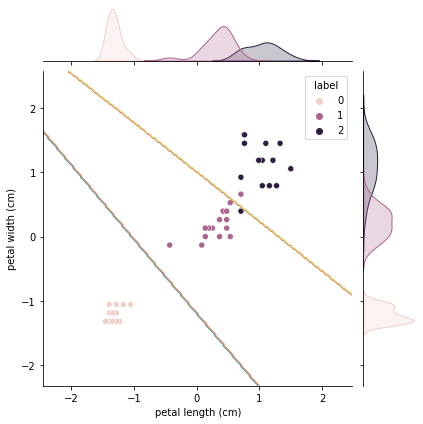

In [ ]:
print("Best params:",random_search.best_params_)
print("Best score:",random_search.best_score_)
model = random_search.best_estimator_
printScores(model, X=X_test, Y=Y_test) 
plot_multiclass_decision(X_test, Y_test, model)